آمار توصیفی
Q6

<b> Preparing data</b>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 24px; color: #ffffff; font-weight: bold; padding: 12px; border-radius: 8px; background: linear-gradient(135deg, #1e3a8a, #4f46e5); text-align: right;"> سوال 6 آمار توصیفی </div>


<b> Q6<b>

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;"> خواندن دیتا </div>


In [8]:
df_q6=pd.read_csv('dataq6')

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">  چک کردن مقادیر گمشده و بررسی دیتا</div>


In [9]:
df_q6.isna().sum()

Address            0
year               0
income_w_y_sum     0
sale_sum           0
total_other_sum    0
income             0
dtype: int64

In [10]:
df_q6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132042 entries, 0 to 132041
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Address          132042 non-null  int64  
 1   year             132042 non-null  int64  
 2   income_w_y_sum   132042 non-null  float64
 3   sale_sum         132042 non-null  float64
 4   total_other_sum  132042 non-null  float64
 5   income           132042 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 6.0 MB


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">  رسم نمودار برای توزیع درآمد اسمی خانوار در سال های 1398, 1399, 1400, 1401</div>


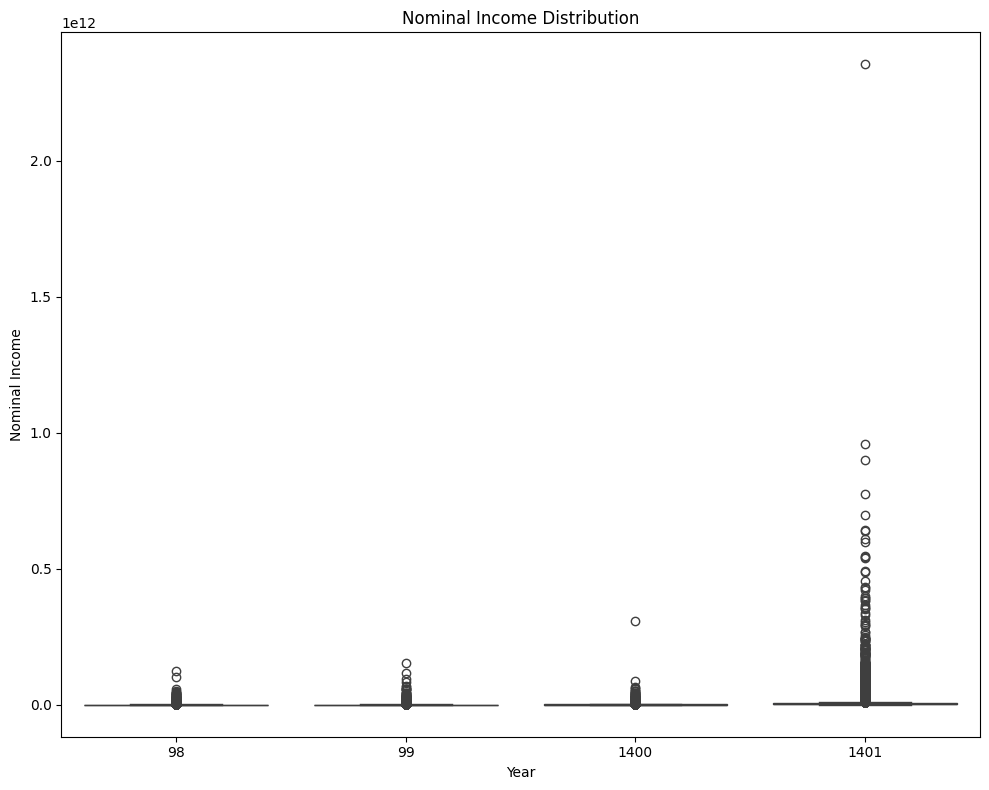

In [11]:
# plotting income distribution
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_q6, x='year', y='income')


plt.title('Nominal Income Distribution')
plt.xlabel('Year')
plt.ylabel('Nominal Income')
plt.tight_layout()
plt.show()

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">تعریف نرخ تورم سالانه با سال پایه 95</div>
<a href="https://www.cbi.ir/Inflation/Inflation_FA.aspx">منبع(سایت بانک مرکزی)</a>

In [12]:
#defining inflation indicies for each year to calculate real income
inflation_index = {
    1398: 41.2,  
    1399: 47.1,
    1400: 46.2,  
    1401: 46.5   
}
df_q6['year'] = df_q6['year'].astype(int)



In [13]:
# replacing 98 and 99 with 1398 and 1399
df_q6['year'] = df_q6['year'].replace({98: 1398, 99: 1399})

df_q6.head()

,Address,year,income_w_y_sum,sale_sum,total_other_sum,income
0,10001000108,1398,0.0,0.0,0.0,0.0
1,10001000111,1398,600000000.0,0.0,0.0,600000000.0
2,10001000113,1399,240000000.0,0.0,0.0,240000000.0
3,10001000114,1398,0.0,0.0,0.0,0.0
4,10001000116,1399,0.0,0.0,0.0,0.0


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">به دست آوردن درآمد حقیقی</div>

In [14]:
# calculating real income
df_q6['real_income'] = df_q6.apply(
    lambda row: row['income'] / inflation_index.get(int(row['year']), float('nan')), axis=1
)

In [15]:
df_q6

,Address,year,income_w_y_sum,sale_sum,total_other_sum,income,real_income
0,10001000108,1398,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
1,10001000111,1398,6.000000e+08,0.000000e+00,0.0,6.000000e+08,1.456311e+07
2,10001000113,1399,2.400000e+08,0.000000e+00,0.0,2.400000e+08,5.095541e+06
3,10001000114,1398,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
4,10001000116,1399,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...
132037,23006709832,1400,1.200000e+09,0.000000e+00,0.0,1.200000e+09,2.597403e+07
132038,23006709832,1401,0.000000e+00,1.200000e+09,636530000.0,1.836530e+09,3.949527e+07
132039,23006709835,1401,1.215000e+09,0.000000e+00,129530000.0,1.344530e+09,2.891462e+07
132040,23006709838,1401,0.000000e+00,0.000000e+00,300700000.0,3.007000e+08,6.466667e+06


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">  رسم نمودار برای توزیع درآمد حقیقی خانوار در سال های 1398, 1399, 1400, 1401</div>


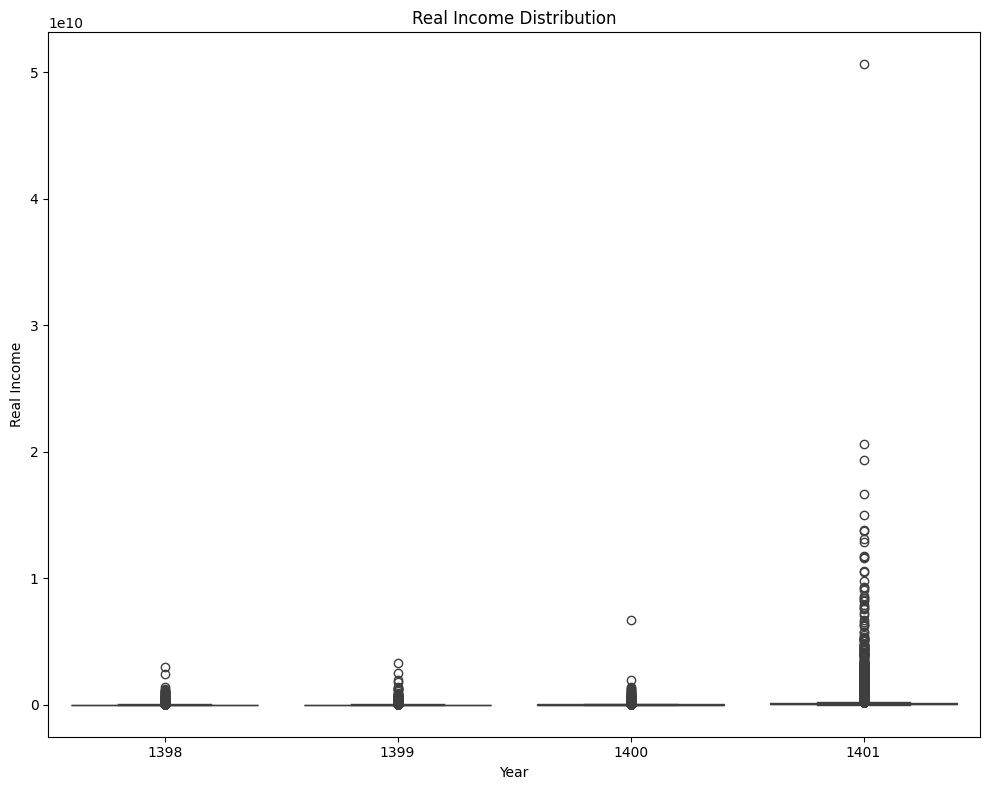

In [16]:
#plotting real income distribution

plt.figure(figsize=(10, 8))
sns.boxplot(data=df_q6, x='year', y='real_income')

plt.title('Real Income Distribution')
plt.xlabel('Year')
plt.ylabel('Real Income')
plt.tight_layout()
plt.show()

### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #3b82f6, #60a5fa); text-align: right;">  رسم نمودار برای بررسی روند درآمد اسمی و حقیقی در یک صفحه</div>


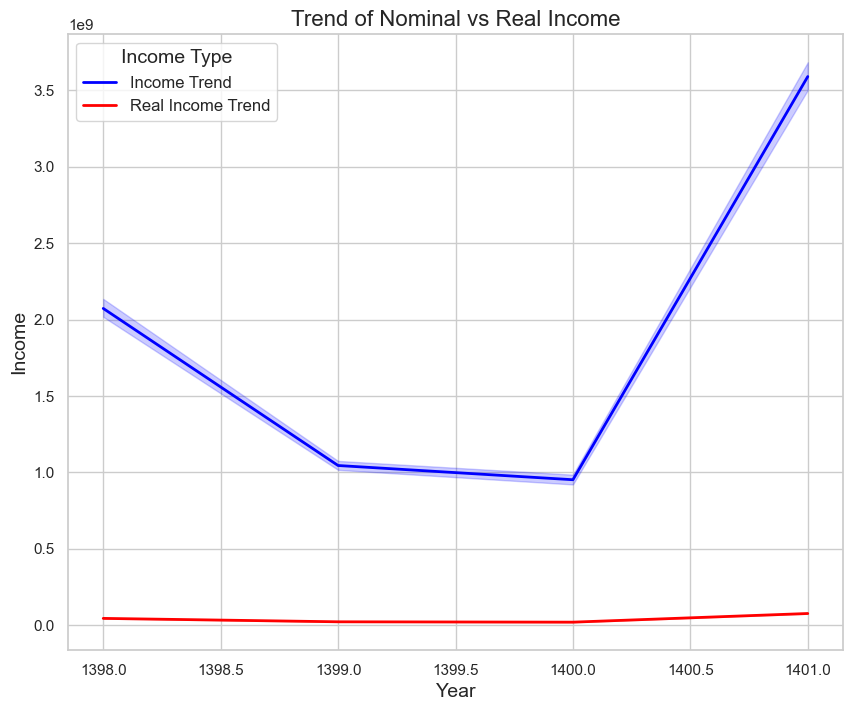

In [17]:
#comparing income and real income trend


df_q6['income_trend'] = df_q6['income'].rolling(window=5).mean()
df_q6['real_income_trend'] = df_q6['real_income'].rolling(window=5).mean()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))


sns.lineplot(x=df_q6['year'], y=df_q6['income_trend'], label='Income Trend', color='blue', linewidth=2)
sns.lineplot(x=df_q6['year'], y=df_q6['real_income_trend'], label='Real Income Trend', color='red', linewidth=2)

plt.title('Trend of Nominal vs Real Income', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Income', fontsize=14)


plt.legend(title='Income Type', title_fontsize='14', fontsize='12')

plt.show()
